In [7]:
#https://www.powercms.in/blog/how-get-json-data-remote-url-python-script

import urllib.request, json

#save url inside variable as raw string
url = r"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=MSFT&interval=5min&apikey=demo"

#use urllib.request.urlopen()
response = urllib.request.urlopen(url)

#from var saved (HTTPresponse type), use .read() + .decode('utf-8')
string = response.read().decode('utf-8')

#load string saved into json data
jsondata = json.loads(string)

print(jsondata)

#https://www.alphavantage.co/
#https://www.alphavantage.co/documentation/
#https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=MSFT&interval=5min&apikey=demo
#https://www.alphavantage.co/support/#api-key

#API KEY is CQ46NBPLL6S1GP9C

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'MSFT', '3. Last Refreshed': '2019-03-22 16:00:00', '4. Interval': '5min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2019-03-22 16:00:00': {'1. open': '117.5250', '2. high': '117.5300', '3. low': '117.0400', '4. close': '117.0500', '5. volume': '2804080'}, '2019-03-22 15:55:00': {'1. open': '117.5400', '2. high': '117.5400', '3. low': '117.3600', '4. close': '117.5100', '5. volume': '678869'}, '2019-03-22 15:50:00': {'1. open': '117.1900', '2. high': '117.5500', '3. low': '117.1900', '4. close': '117.5400', '5. volume': '689771'}, '2019-03-22 15:45:00': {'1. open': '117.5050', '2. high': '117.5500', '3. low': '117.1400', '4. close': '117.1900', '5. volume': '694711'}, '2019-03-22 15:40:00': {'1. open': '117.4700', '2. high': '117.6500', '3. low': '117.4100', '4. close': '117.4900', '5. volume': '445113'}, '2019-03-22 15:35:00': {'1. open': 

In [8]:
jsondata['Meta Data']

{'1. Information': 'Intraday (5min) open, high, low, close prices and volume',
 '2. Symbol': 'MSFT',
 '3. Last Refreshed': '2019-03-22 16:00:00',
 '4. Interval': '5min',
 '5. Output Size': 'Compact',
 '6. Time Zone': 'US/Eastern'}

In [9]:
jsondata['Time Series (5min)']

{'2019-03-22 16:00:00': {'1. open': '117.5250',
  '2. high': '117.5300',
  '3. low': '117.0400',
  '4. close': '117.0500',
  '5. volume': '2804080'},
 '2019-03-22 15:55:00': {'1. open': '117.5400',
  '2. high': '117.5400',
  '3. low': '117.3600',
  '4. close': '117.5100',
  '5. volume': '678869'},
 '2019-03-22 15:50:00': {'1. open': '117.1900',
  '2. high': '117.5500',
  '3. low': '117.1900',
  '4. close': '117.5400',
  '5. volume': '689771'},
 '2019-03-22 15:45:00': {'1. open': '117.5050',
  '2. high': '117.5500',
  '3. low': '117.1400',
  '4. close': '117.1900',
  '5. volume': '694711'},
 '2019-03-22 15:40:00': {'1. open': '117.4700',
  '2. high': '117.6500',
  '3. low': '117.4100',
  '4. close': '117.4900',
  '5. volume': '445113'},
 '2019-03-22 15:35:00': {'1. open': '117.7400',
  '2. high': '117.7600',
  '3. low': '117.4600',
  '4. close': '117.4700',
  '5. volume': '425806'},
 '2019-03-22 15:30:00': {'1. open': '118.0400',
  '2. high': '118.0800',
  '3. low': '117.7500',
  '4. cl

In [10]:
jsondata['Time Series (5min)']['2019-03-22 16:00:00']

{'1. open': '117.5250',
 '2. high': '117.5300',
 '3. low': '117.0400',
 '4. close': '117.0500',
 '5. volume': '2804080'}

In [11]:
jsondata['Time Series (5min)']['2019-03-22 16:00:00']['1. open']

'117.5250'

In [12]:
#from class datetime import subclass datetime
from datetime import datetime
lastsaved = jsondata['Meta Data']['3. Last Refreshed']
print(lastsaved)

lastsaved_DT = datetime.strptime(lastsaved, "%Y-%m-%d %H:%M:%S")
print(lastsaved_DT)

2019-03-22 16:00:00
2019-03-22 16:00:00


In [13]:
#Aim, make many strings with format 2019-03-22 16:00:00 so in 5 min interval so that can plot graph

In [14]:
from datetime import datetime

#Aim, make many strings with format 2019-03-22 16:00:00 so in 5 min interval so that can plot graph

#Get current timings
curday = int(lastsaved_DT.strftime("%d"))
curmonth = int(lastsaved_DT.strftime("%m"))
curyear = int(lastsaved_DT.strftime("%Y"))
curhour = int(lastsaved_DT.strftime("%H"))
curminute = int(lastsaved_DT.strftime("%M"))

#UNIX time starts on 1970 Jan 1
#use the subtraction of two datetime and .total_seconds function to get time in float --> convert to int
print(int(lastsaved_DT.timestamp()))


yesterdayint = lastsaved_DT.timestamp() - 86400
yesterday = datetime.fromtimestamp(yesterdayint)
print(lastsaved_DT)
print(yesterday)

1553241600
2019-03-22 16:00:00
2019-03-21 16:00:00


In [15]:
from datetime import timedelta
#Aim: Create a long list of datetime with 5 min interval
#Definition of timedelta: class datetime.timedelta([days,] [seconds,] [microseconds,] [milliseconds,] [minutes,] [hours,] [weeks])

#timedelta allows time or date addition directly and you can combine it with list comprehension to get list of time
time = [yesterday + timedelta(minutes=i) for i in range(0,1445,5)] #range: start from +0 min, end at +1440 min in interval of +5
time2 = [lastsaved_DT + timedelta(minutes=i) for i in range(-1440,5,5)]

if time == time2:
    print('Both methods of creating time list are same')

print(time)
print('\n')
print(time2)

Both methods of creating time list are same
[datetime.datetime(2019, 3, 21, 16, 0), datetime.datetime(2019, 3, 21, 16, 5), datetime.datetime(2019, 3, 21, 16, 10), datetime.datetime(2019, 3, 21, 16, 15), datetime.datetime(2019, 3, 21, 16, 20), datetime.datetime(2019, 3, 21, 16, 25), datetime.datetime(2019, 3, 21, 16, 30), datetime.datetime(2019, 3, 21, 16, 35), datetime.datetime(2019, 3, 21, 16, 40), datetime.datetime(2019, 3, 21, 16, 45), datetime.datetime(2019, 3, 21, 16, 50), datetime.datetime(2019, 3, 21, 16, 55), datetime.datetime(2019, 3, 21, 17, 0), datetime.datetime(2019, 3, 21, 17, 5), datetime.datetime(2019, 3, 21, 17, 10), datetime.datetime(2019, 3, 21, 17, 15), datetime.datetime(2019, 3, 21, 17, 20), datetime.datetime(2019, 3, 21, 17, 25), datetime.datetime(2019, 3, 21, 17, 30), datetime.datetime(2019, 3, 21, 17, 35), datetime.datetime(2019, 3, 21, 17, 40), datetime.datetime(2019, 3, 21, 17, 45), datetime.datetime(2019, 3, 21, 17, 50), datetime.datetime(2019, 3, 21, 17, 55),

In [16]:
timestring = []

#9:35 to 16:00 only
for datetime_element in time2:
    if int(datetime_element.strftime('%H')) > 8 and int(datetime_element.strftime('%H')) < 17: #narrow down to from 9am-455pm
        if int(datetime_element.strftime('%H')) != 9 and int(datetime_element.strftime('%H')) != 16: 
            #if its from 10am-1555pm, instant accept
            timestring.append(datetime_element.strftime('%Y-%m-%d %H:%M:%S'))
        elif int(datetime_element.strftime('%H')) == 9 and int(datetime_element.strftime('%M')) > 34: 
            #accept 9am only if its 935 and later
            timestring.append(datetime_element.strftime('%Y-%m-%d %H:%M:%S'))
        elif int(datetime_element.strftime('%H')) == 16 and int(datetime_element.strftime('%M')) == 0:
            timestring.append(datetime_element.strftime('%Y-%m-%d %H:%M:%S'))
            #accept 4pm if its strictly 4pm only
            
    
timestring

['2019-03-21 16:00:00',
 '2019-03-22 09:35:00',
 '2019-03-22 09:40:00',
 '2019-03-22 09:45:00',
 '2019-03-22 09:50:00',
 '2019-03-22 09:55:00',
 '2019-03-22 10:00:00',
 '2019-03-22 10:05:00',
 '2019-03-22 10:10:00',
 '2019-03-22 10:15:00',
 '2019-03-22 10:20:00',
 '2019-03-22 10:25:00',
 '2019-03-22 10:30:00',
 '2019-03-22 10:35:00',
 '2019-03-22 10:40:00',
 '2019-03-22 10:45:00',
 '2019-03-22 10:50:00',
 '2019-03-22 10:55:00',
 '2019-03-22 11:00:00',
 '2019-03-22 11:05:00',
 '2019-03-22 11:10:00',
 '2019-03-22 11:15:00',
 '2019-03-22 11:20:00',
 '2019-03-22 11:25:00',
 '2019-03-22 11:30:00',
 '2019-03-22 11:35:00',
 '2019-03-22 11:40:00',
 '2019-03-22 11:45:00',
 '2019-03-22 11:50:00',
 '2019-03-22 11:55:00',
 '2019-03-22 12:00:00',
 '2019-03-22 12:05:00',
 '2019-03-22 12:10:00',
 '2019-03-22 12:15:00',
 '2019-03-22 12:20:00',
 '2019-03-22 12:25:00',
 '2019-03-22 12:30:00',
 '2019-03-22 12:35:00',
 '2019-03-22 12:40:00',
 '2019-03-22 12:45:00',
 '2019-03-22 12:50:00',
 '2019-03-22 12:

In [17]:
microsoftopen = []
microsofthigh = []
microsoftlow = []
microsoftclose = []

for string in timestring:
    microsoftopen.append(float(jsondata['Time Series (5min)'][string]['1. open']))
    microsofthigh.append(float(jsondata['Time Series (5min)'][string]['2. high']))
    microsoftlow.append(float(jsondata['Time Series (5min)'][string]['3. low']))
    microsoftclose.append(float(jsondata['Time Series (5min)'][string]['4. close']))
    
    

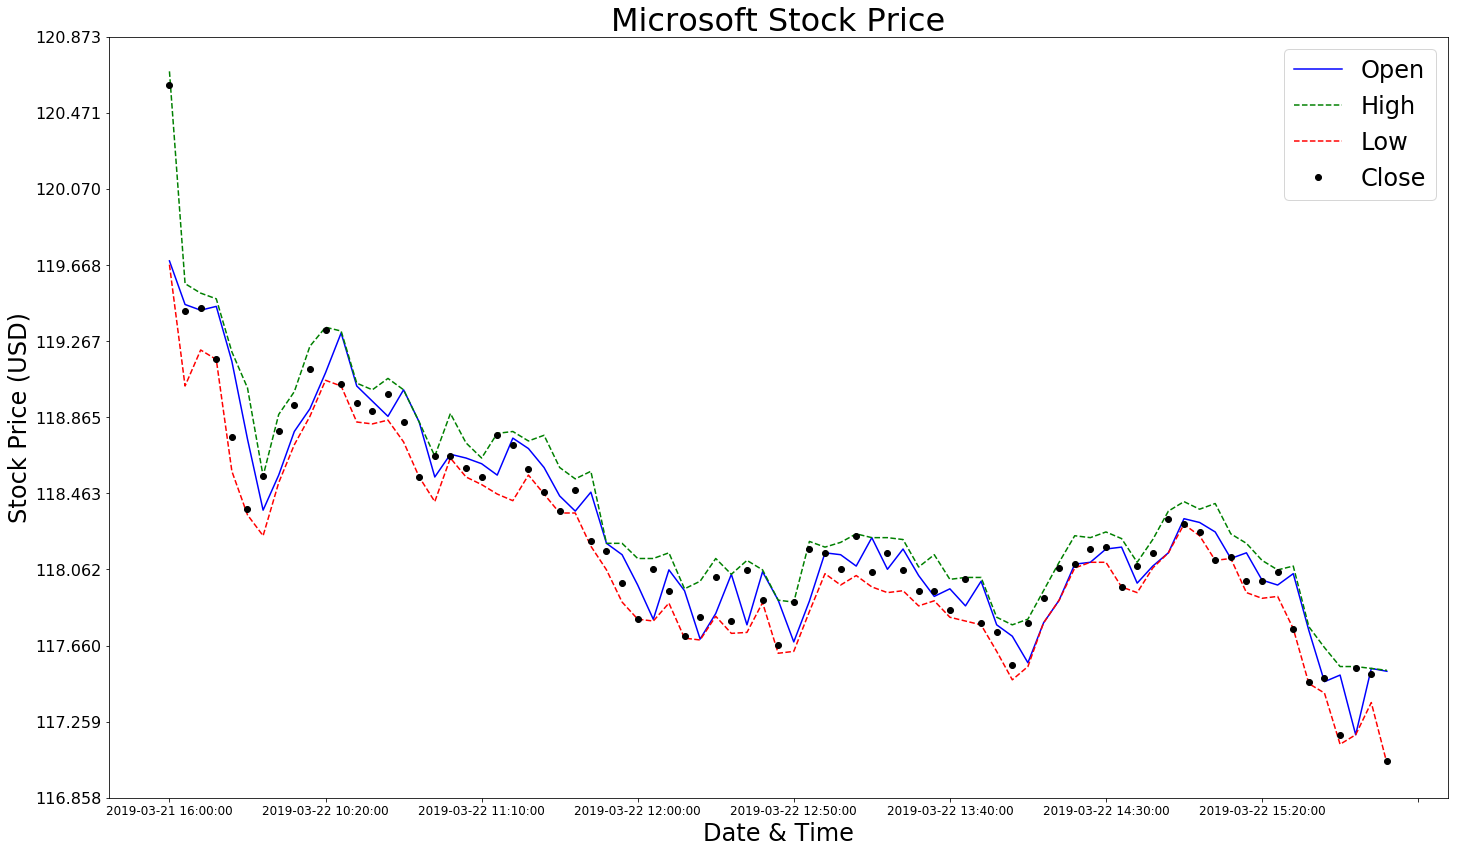

In [22]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import LinearLocator
%matplotlib inline

figure = plt.figure(1,figsize=(24,14))
microsoftplot = figure.add_subplot(111)
microsoftplot.set_xlabel('Date & Time',fontsize=24)
microsoftplot.set_ylabel('Stock Price (USD)',fontsize=24)
microsoftplot.set_title('Microsoft Stock Price',fontsize=32)
microsoftplot.tick_params(axis='y', which='major', labelsize=16)
microsoftplot.tick_params(axis='x', which='major', labelsize=12)
microsoftdailyopen = microsoftplot.plot(timestring,microsoftopen,color='blue', label='Open')
microsoftdailyhigh = microsoftplot.plot(timestring,microsofthigh,'--',color='green', label='High')
microsoftdailylow = microsoftplot.plot(timestring,microsoftlow,'--',color='red', label='Low')
microsoftdailyclose = microsoftplot.plot(timestring,microsoftclose,'o', color='black', label='Close')
microsoftplot.legend(loc=1, fontsize=24)
microsoftplot.xaxis.set_major_locator(MaxNLocator(integer=True))
microsoftplot.yaxis.set_major_locator(LinearLocator(11))
plt.show()
figure.savefig('microsoftstocktoday.jpg')

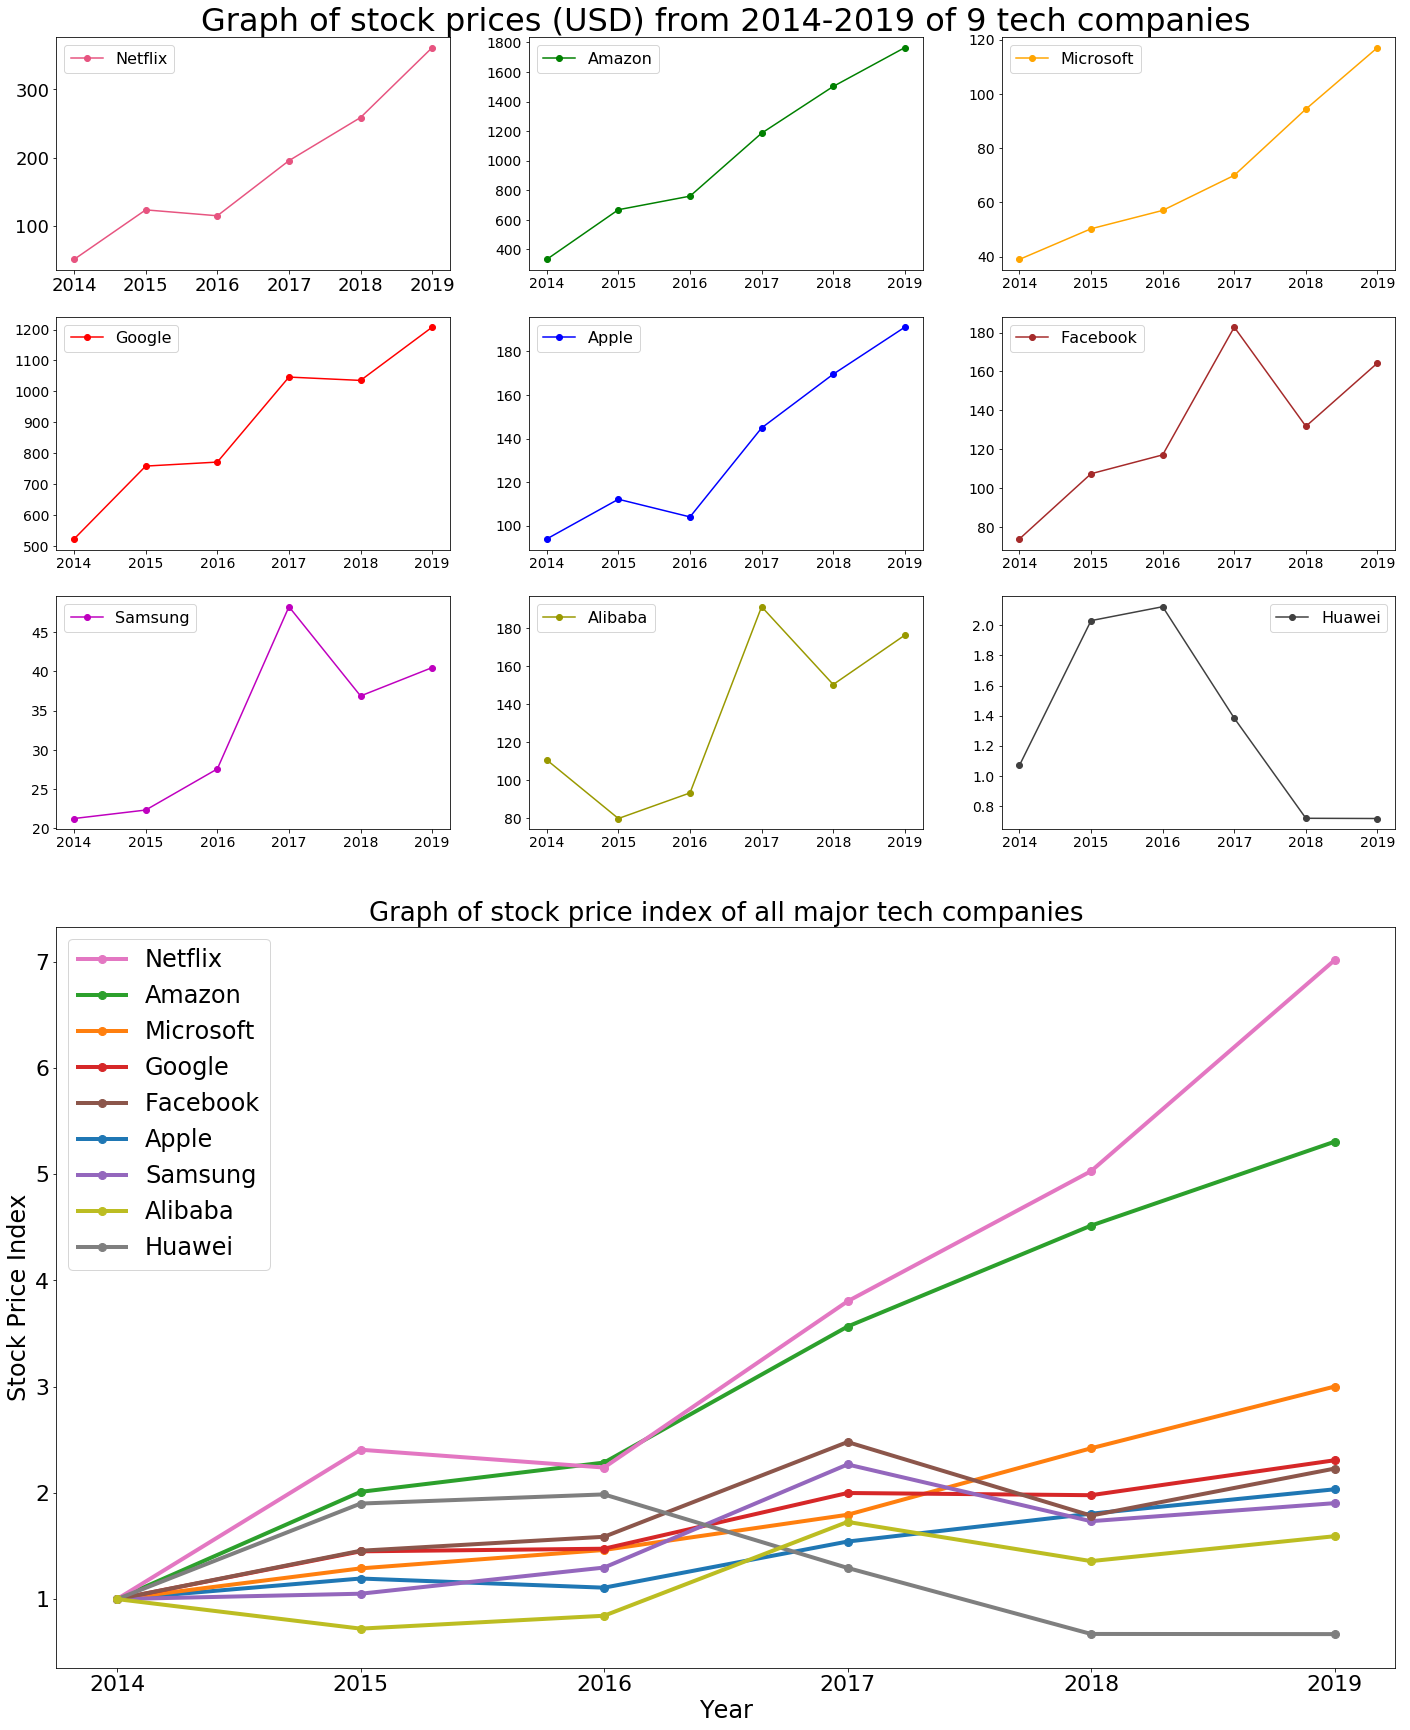

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

#Assignment: Plot a graph of 9 companies in a 6x3 plot (using top 3x3)
#And for bottom 3x3, plot all 9 graphs together with normalized value from initial year 2014
#Range from 2014 to 2018
year = [2014, 2015, 2016, 2017, 2018,2019]

#Create list of all 9 companies and the years from end Nov each year 2014-2018
apple_price = [93.95,112.15,104.05,144.85,169.49,191.05]
microsoft_price = [39.01,50.29,57.05,69.98,94.39,117.05]
amazon_price = [332.63,668.45,760.16,1186,1502.06,1764.77]
google_price = [523.52,758.88,771.82,1046.40,1035.61,1207.65]
samsung_price = [24460/1150,25700/1150,31720/1150,55460/1150,42400/1150,46550/1150]
facebook_price = [73.75,107.32,117.02,182.78,131.73,164.34]
netflix_price = [51.47,123.84,115.21,195.75,258.82,361.01]
huawei_price = [6.95/6.5,13.2/6.5,13.80/6.5,8.99/6.5,4.67/6.5,4.66/6.5]
alibaba_price = [110.73,79.95,93.39,191.19,150.33,176.26]


#Create normalized list of 9 companies stock prices
apple_price_n = np.array(apple_price)/apple_price[0]
microsoft_price_n = np.array(microsoft_price)/microsoft_price[0]
amazon_price_n = np.array(amazon_price)/amazon_price[0]
google_price_n = np.array(google_price)/google_price[0]
samsung_price_n = np.array(samsung_price)/samsung_price[0]
facebook_price_n = np.array(facebook_price)/facebook_price[0]
netflix_price_n = np.array(netflix_price)/netflix_price[0]
huawei_price_n = np.array(huawei_price)/huawei_price[0]
alibaba_price_n = np.array(alibaba_price)/alibaba_price[0]

#Plan of subplot layering (1x1 one for title, 2x1 for overlaid graphs, 6x3 one for small graphs but only occupy top 9 spaces)

#Create big figure
stocks = plt.figure(1,figsize=(24,30))

#Create big subplot for title and remove frame (frameon=False), remove tick parameters
stocks_title = stocks.add_subplot(111, frameon=False) #remove frame but need remove ticks/axes
stocks_title.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
stocks_title.set_title('Graph of stock prices (USD) from 2014-2019 of 9 tech companies', fontsize=32)

#Create big subplot for mega chart using 2x1 plot using normal .add_subplot
#Change x-axis to be integer (year) and y-axis to be integer (price_index)
stocks_big = stocks.add_subplot(212)
apple_n = stocks_big.plot(year, apple_price_n, '-o', label='Apple', linewidth = 4, markersize=8)
microsoft_n = stocks_big.plot(year, microsoft_price_n, '-o', label='Microsoft', linewidth = 4, markersize=8)
amazon_n = stocks_big.plot(year, amazon_price_n, '-o', label='Amazon', linewidth = 4, markersize=8)
google_n = stocks_big.plot(year, google_price_n, '-o', label='Google', linewidth = 4, markersize=8)
samsung_n = stocks_big.plot(year, samsung_price_n, '-o', label='Samsung', linewidth = 4, markersize=8)
facebook_n = stocks_big.plot(year, facebook_price_n, '-o', label='Facebook', linewidth = 4, markersize=8)
netflix_n = stocks_big.plot(year, netflix_price_n, '-o', label='Netflix', linewidth = 4, markersize=8)
huawei_n = stocks_big.plot(year, huawei_price_n, '-o', label='Huawei', linewidth = 4, markersize=8)
alibaba_n = stocks_big.plot(year, alibaba_price_n, '-o', label='Alibaba', linewidth = 4, markersize=8)
#legend_n = stocks_big.legend(loc=2, fontsize=24) #see below for loc positions in subplot

#get all handle/variable storing the legend in a tuple from 0-8 and also all label of the legend var in a tuple from 0-8
#each element n of the tuple has a pair of handle/label associated
handlesN, labelsN = plt.gca().get_legend_handles_labels()
order = [6,2,1,3,5,0,4,8,7] #labels checked for order of best performing stock and least performing n index auto obtained
stocks_big.legend([handlesN[idx] for idx in order],[labelsN[idx] for idx in order], loc=2, fontsize=24)
stocks_big.tick_params(axis='both', which='major', labelsize=22)
stocks_big.set_title('Graph of stock price index of all major tech companies', fontsize=26)
stocks_big.set_xlabel('Year',fontsize=24)
stocks_big.set_ylabel('Stock Price Index',fontsize=24)
stocks_big.xaxis.set_major_locator(MaxNLocator(integer=True))
stocks_big.yaxis.set_major_locator(MaxNLocator(integer=True))

#Create figure with subplot size 6x3 plot using fig, axes_small (axes_small is np.array)
#Found out that it is easier to use big figure and overlay many different size of subplot (1x1 title), (2x1 big chart),
#(6x3 small charts) into a single figure
#instead of using fig, axes to define fig and axes (matrix size) tgt since there is varying sizes

#Change x-axis to be integer (year) and y-axis to be float (prices)
netflix_s = stocks.add_subplot(631)
netflix_s.plot(year,netflix_price, '-o',color=(231/255,84/255,128/255), label='Netflix') #define color as rgb tuple
netflix_s.legend(fontsize=16, loc=2)
netflix_s.tick_params(axis='both', which='major', labelsize=18)
netflix_s.xaxis.set_major_locator(MaxNLocator(integer=True))

amazon_s = stocks.add_subplot(632)
amazon_s.plot(year,amazon_price, '-o', color='green', label='Amazon')
amazon_s.legend(fontsize=16, loc=2)
amazon_s.tick_params(axis='both', which='major', labelsize=14)
amazon_s.xaxis.set_major_locator(MaxNLocator(integer=True))

microsoft_s = stocks.add_subplot(633)
microsoft_s.plot(year,microsoft_price, '-o', color='orange', label='Microsoft')
microsoft_s.legend(fontsize=16, loc=2)
microsoft_s.tick_params(axis='both', which='major', labelsize=14)
microsoft_s.xaxis.set_major_locator(MaxNLocator(integer=True))

google_s = stocks.add_subplot(634)
google_s.plot(year,google_price, '-o', color='red', label='Google')
google_s.legend(fontsize=16, loc=2)
google_s.tick_params(axis='both', which='major', labelsize=14)
google_s.xaxis.set_major_locator(MaxNLocator(integer=True))

apple_s = stocks.add_subplot(635)
apple_s.plot(year,apple_price, '-o', color='blue', label='Apple')
apple_s.legend(fontsize=16, loc=2)
apple_s.tick_params(axis='both', which='major', labelsize=14)
apple_s.xaxis.set_major_locator(MaxNLocator(integer=True))

facebook_s = stocks.add_subplot(636)
facebook_s.plot(year,facebook_price, '-o', color='brown', label='Facebook')
facebook_s.legend(fontsize=16, loc=2)
facebook_s.tick_params(axis='both', which='major', labelsize=14)
facebook_s.xaxis.set_major_locator(MaxNLocator(integer=True))

samsung_s = stocks.add_subplot(637)
samsung_s.plot(year,samsung_price, '-o',color='m', label='Samsung') #m is magenta
samsung_s.legend(fontsize=16, loc=2)
samsung_s.tick_params(axis='both', which='major', labelsize=14)
samsung_s.xaxis.set_major_locator(MaxNLocator(integer=True))

alibaba_s = stocks.add_subplot(638)
alibaba_s.plot(year,alibaba_price, '-o', color='#999900', label='Alibaba') #can put html hex code for dark yellow
alibaba_s.legend(fontsize=16, loc=2)
alibaba_s.tick_params(axis='both', which='major', labelsize=14)
alibaba_s.xaxis.set_major_locator(MaxNLocator(integer=True))

huawei_s = stocks.add_subplot(639)
huawei_s.plot(year,huawei_price, '-o', color='0.25', label='Huawei') #value of 0-1 as string means gray
huawei_s.legend(fontsize=16, loc=1)
huawei_s.tick_params(axis='both', which='major', labelsize=14)
huawei_s.xaxis.set_major_locator(MaxNLocator(integer=True))
#Create all 9 subplots in small cells with ORIGINAL prices

plt.show()
stocks.savefig('sampledashboard.jpg')